In [7]:
import numpy as np
import pandas as pd
import pywt
import seaborn as sns
import scaleogram as scg 
import matplotlib.pyplot as plt
import matplotlib.gridspec as GridSpec
from mat4py import loadmat
from scipy.fftpack import fft

from IPython.display import display, Markdown, clear_output, HTML

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

<h2>Time series feature extraction: Fourier and Wavelet transform</h2>
<h3>Use case: ECG classification</h3>

<h3>ABSTRACT</h3>
In this article we propose a basic review of features extraction on time series and signals taking advantage of Fourier and Wavelet transforms. However, it is worth to mention that these two techniques are the visible part of the iceberg because signal processing is a widespread field, Book. In a second step we will use the transformed signals to train a classification model. To carry out this task, we will work with a particular data set to serve as a guide during the article, an electrocardiogram (ECG).

<a href="https://blog.octo.com/en/time-series-features-extraction-using-fourier-and-wavelet-transforms-on-ecg-data/"> Time Series on ECG Data </a> <br>
<a href="https://github.com/mnf2014/article_fft_wavelet_ecg/blob/develop/wavelet_article_octo.ipynb"> Github Code on ECG Time Series </a> <br>

In [16]:
# source : 'https://www.mathworks.com/help/wavelet/examples/signal-classification-with-wavelet-analysis-and-convolutional-neural-networks.html'
# Create list of data and labels from dictionary
data = loadmat(r"C:\Users\kew.jingsheng\Documents\01-Project\02-LocalMachine\06-RETAILS\resources\ECGData.mat")

ecg_total = len(data['ECGData']['Data'])
ecg_data = []
ecg_labels = []
for i in range(0, ecg_total):
    ecg_data.append(data['ECGData']['Data'][i])
    ecg_labels.append(data['ECGData']['Labels'][i])

flat_list_ecg_labels = [item for sublist in ecg_labels for item in sublist]

Text(0.5, 1.0, 'NSR Signal')

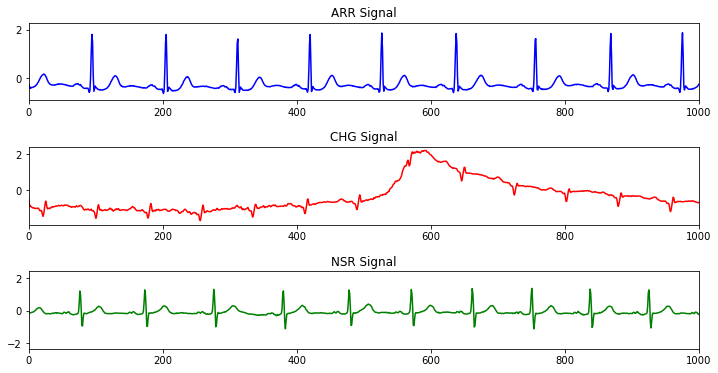

In [10]:
# Data Visualization

fig = plt.figure(figsize=(12, 6))
grid = plt.GridSpec(3, 1, hspace=0.6)

arr_signal = fig.add_subplot(grid[0, 0])
chg_signal = fig.add_subplot(grid[1, 0])
nsr_signal = fig.add_subplot(grid[2, 0])

arr_signal.plot(range(0, len(data['ECGData']['Data'][33]), 1), ecg_data[33], color = 'blue')
arr_signal.set_xlim(0, 1000)
arr_signal.set_title('ARR Signal')

chg_signal.plot(range(0, len(data['ECGData']['Data'][100]), 1), ecg_data[100], color = 'red')
chg_signal.set_xlim(0, 1000)
chg_signal.set_title('CHG Signal')

nsr_signal.plot(range(0, len(data['ECGData']['Data'][150]), 1), ecg_data[150], color = 'green')
nsr_signal.set_xlim(0, 1000)
nsr_signal.set_title('NSR Signal')

#fig.savefig('Figure_1.png')   # save the figure to file
#plt.close(fig)

In [11]:
#Sythetic data generation and FFT 

N = 10000
x_values = np.linspace(0, 100, N)
amplitudes = [4, 1.5, 9]
frequencies = [2, 5, 3]
y_values_0 = amplitudes[0]*np.cos(2*np.pi*frequencies[0]*x_values) 
y_values_1 = amplitudes[1]*np.sin(2*np.pi*frequencies[1]*x_values) 
y_values_2 = amplitudes[2]*np.cos(2*np.pi*frequencies[2]*x_values + 0.4) 
    

full_signal_values = (y_values_0 + y_values_1 - y_values_2)
full_signal_fft_values = fft(full_signal_values)
full_signal_fft_values = (2/N) * np.abs(full_signal_fft_values)

Text(8, 3, 'Second\ncomponent')

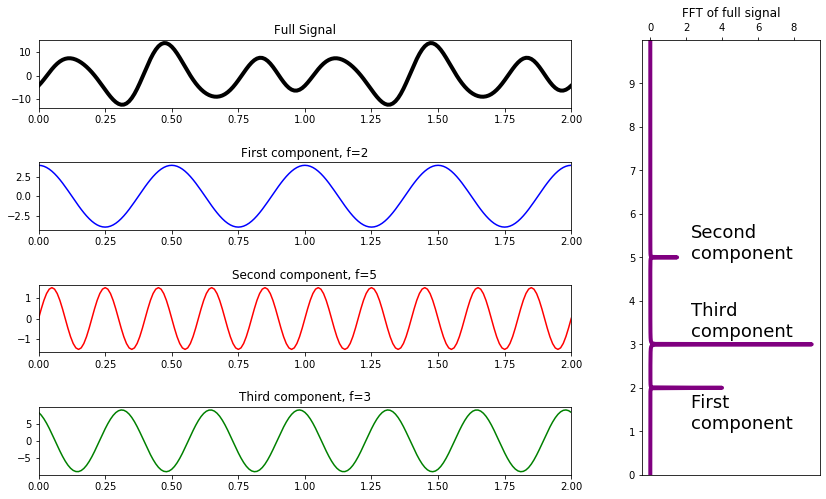

In [14]:
# Plot FFT results of synthetic data

fig = plt.figure(figsize=(14, 8))
widths = [3, 1]
heights = [1, 1, 1, 1]
grid = plt.GridSpec(4, 2, wspace=0.2, hspace=0.8, width_ratios=widths, height_ratios=heights)

full_signal = fig.add_subplot(grid[0, 0])
first_comp = fig.add_subplot(grid[1, 0])
second_comp = fig.add_subplot(grid[2, 0])
third_comp = fig.add_subplot(grid[3, 0])
fft_result = fig.add_subplot(grid[0:, 1])

#Synthetic data
full_signal.plot(list(x_values), list(full_signal_values), color='black', linewidth=4)
full_signal.set_xlim(0, 2)
full_signal.set_title('Full Signal')
first_comp.plot(list(x_values), list(y_values_0), color = 'blue')
first_comp.set_xlim(0, 2)
first_comp.set_title('First component, f=2')
second_comp.plot(list(x_values), list(y_values_1), color = 'red')
second_comp.set_xlim(0, 2)
second_comp.set_title('Second component, f=5')
third_comp.plot(list(x_values), list(y_values_2), color = 'green')
third_comp.set_xlim(0, 2)
third_comp.set_title('Third component, f=3')

#FFT
fft_result.xaxis.tick_top()
fft_result.plot(list(full_signal_fft_values), list(x_values), color = 'purple', linewidth=4)
fft_result.set_ylim(0, 10)
fft_result.set_yticks(np.arange(0, 10, step=1))
fft_result.set_title('FFT of full signal')
fft_result.annotate('First\ncomponent',
            xy=(1.8, 1), xycoords='data',
            xytext=(8, 3), textcoords='offset points',
            size=18)
fft_result.annotate('Third\ncomponent',
            xy=(1.8, 3.1), xycoords='data',
            xytext=(8, 3), textcoords='offset points',
            size=18)

fft_result.annotate('Second\ncomponent',
            xy=(1.8, 4.9), xycoords='data',
            xytext=(8, 3), textcoords='offset points',
            size=18)

Text(0.5, 1.0, 'FFT of full signal')

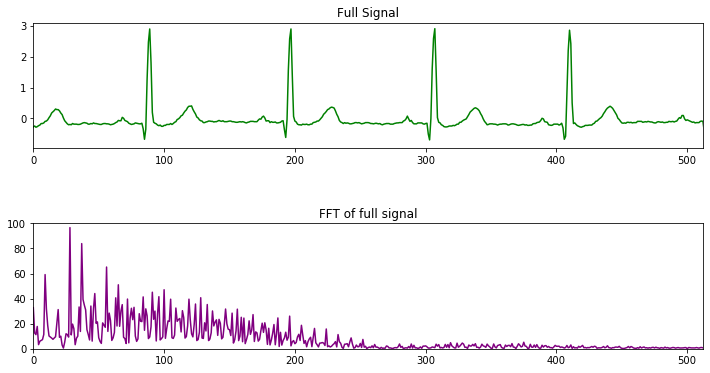

In [22]:
#Arr signal Fourier Transform
nn = 160
signal_length = 1000
full_signal_fft_values = np.abs(fft(ecg_data[nn][:signal_length]))
x_values_fft = range(0, len(data['ECGData']['Data'][nn]), 1)[:signal_length]

fig = plt.figure(figsize=(12, 6))
grid = plt.GridSpec(2, 1,hspace=0.6)

full_signal = fig.add_subplot(grid[0, 0])
fft_comp = fig.add_subplot(grid[1, 0])

full_signal.plot(x_values_fft, ecg_data[nn][:signal_length], color = 'green')
full_signal.set_xlim(0, 512)
full_signal.set_title('Full Signal')
fft_comp.plot(x_values_fft, list(full_signal_fft_values), color = 'purple')
fft_comp.set_xlim(0, 512)
fft_comp.set_ylim(0, 100)
fft_comp.set_title('FFT of full signal')

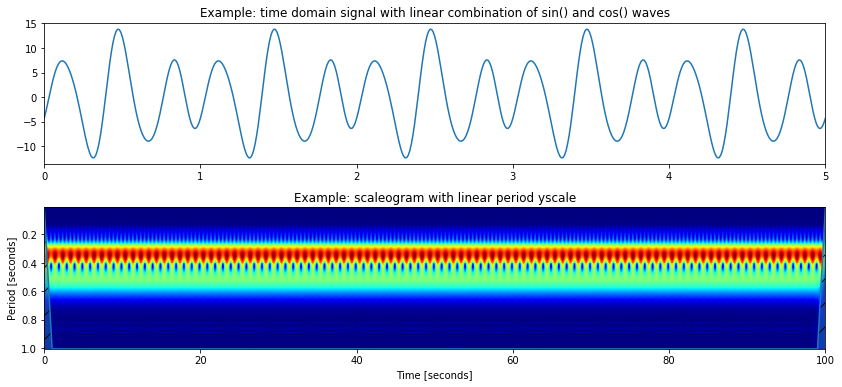

In [23]:
# Example of Wavelet transform for Synthetic data
N = 10000
x_values_wvt = np.linspace(0, 100, N)
amplitudes = [4, 1.5, 9]
frequencies = [2, 5, 3]
y_values_0 = amplitudes[0]*np.cos(2*np.pi*frequencies[0]*x_values) 
y_values_1 = amplitudes[1]*np.sin(2*np.pi*frequencies[1]*x_values) 
y_values_2 = amplitudes[2]*np.cos(2*np.pi*frequencies[2]*x_values + 0.4) 
full_signal_values = (y_values_0 + y_values_1 - y_values_2)

wavelet='cmor0.7-1.5'

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6))
fig.subplots_adjust(hspace=0.3)
ax1.plot(x_values_wvt, full_signal_values); ax1.set_xlim(0, 5)
ax1.set_title('Example: time domain signal with linear combination of sin() and cos() waves')
ax2 = scg.cws(x_values_wvt, full_signal_values, scales=np.arange(1, 150), wavelet=wavelet,
        ax=ax2, cmap="jet", cbar=None, ylabel="Period [seconds]", xlabel="Time [seconds]",
        title='Example: scaleogram with linear period yscale')

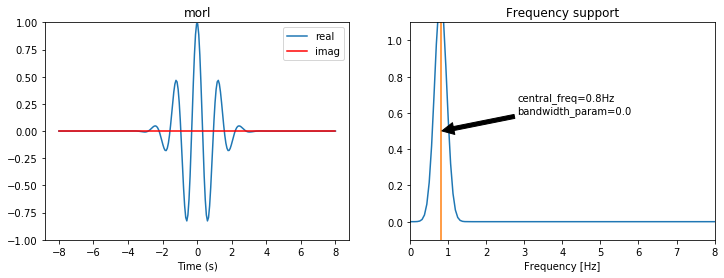

In [24]:
#Morlet wavelet
axes = scg.plot_wav('morl', figsize=(12,4))

In [25]:
pywt.families(False)

['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

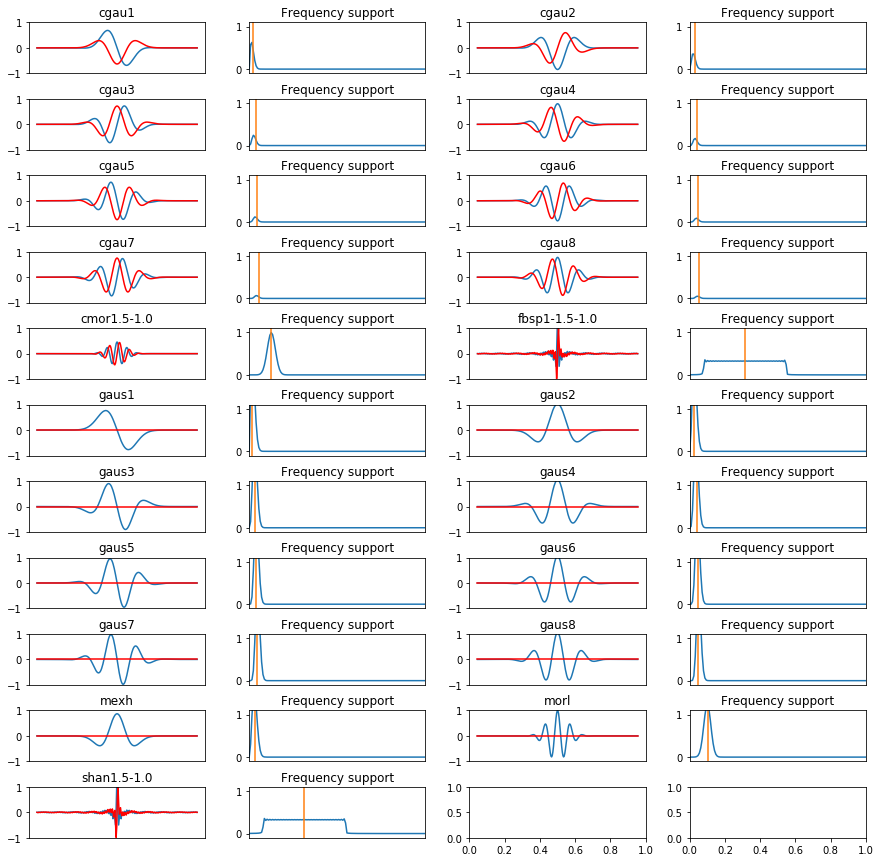

In [26]:
scg.plot_wavelets(figsize=(15,15))

Default wavelet function used to compute the transform: gaus6 ( Gaussian )


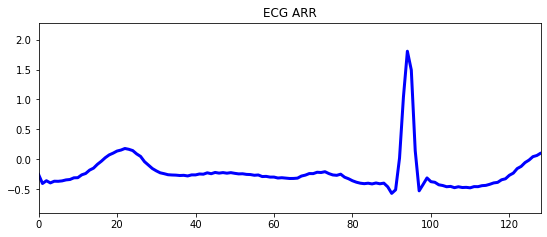

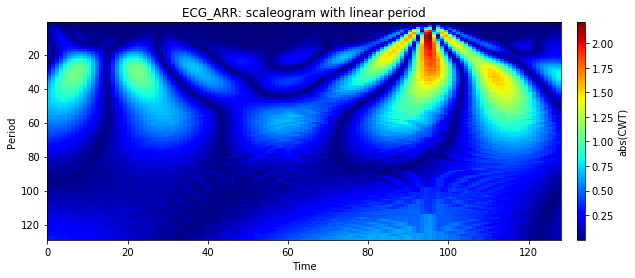

In [36]:
# choose default wavelet function 
scg.set_default_wavelet('gaus6')

nn = 33
signal_length = 128
# range of scales to perform the transform
scales = scg.periods2scales( np.arange(1, signal_length+1) )
x_values_wvt_arr = range(0,len(ecg_data[nn]),1)

# plot the signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(9, 3.5));  
ax1.plot(x_values_wvt_arr, ecg_data[nn], linewidth=3, color='blue')
ax1.set_xlim(0, signal_length)
ax1.set_title("ECG ARR")

# the scaleogram
scg.cws(ecg_data[nn][:signal_length], scales=scales, figsize=(10, 4.0), coi = False, ylabel="Period", xlabel="Time",
        title='ECG_ARR: scaleogram with linear period'); 

print("Default wavelet function used to compute the transform:", scg.get_default_wavelet(), "(",
      pywt.ContinuousWavelet(scg.get_default_wavelet()).family_name, ")")

Default wavelet function used to compute the transform: morl ( Morlet wavelet )


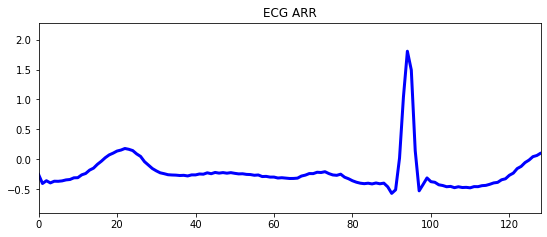

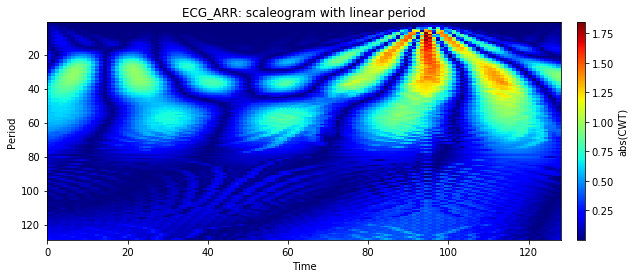

In [29]:
# choose default wavelet function 
scg.set_default_wavelet('morl')

nn = 33
signal_length = 128
# range of scales to perform the transform
scales = scg.periods2scales( np.arange(1, signal_length+1) )
x_values_wvt_arr = range(0,len(ecg_data[nn]),1)

# plot the signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(9, 3.5));  
ax1.plot(x_values_wvt_arr, ecg_data[nn], linewidth=3, color='blue')
ax1.set_xlim(0, signal_length)
ax1.set_title("ECG ARR")

# the scaleogram
scg.cws(ecg_data[nn][:signal_length], scales=scales, figsize=(10, 4.0), coi = False, ylabel="Period", xlabel="Time",
        title='ECG_ARR: scaleogram with linear period'); 

print("Default wavelet function used to compute the transform:", scg.get_default_wavelet(), "(",
      pywt.ContinuousWavelet(scg.get_default_wavelet()).family_name, ")")